## Data Science I Digital House

**Trabajo Final I Septiembre 2021**

Integrantes del equipo: Etchepare, Bernardo; Furgiele, Juan Pablo; Paradas, Maria Eugenia; Tamis, Josefina.

1. Imports y carga de datos.
2. Análisis del dataset y tranformaciones iniciales.
3. Interacción de variables predictivas.
4. Modelo de regresión logística
    - Primer modelo de regresión logística para clases desbalanceadas: definición de hiperrarámetros con Grid Search.
    - Exploración de técnicas para clases desbalanceadas: Undersampling, Oversampling, Smote.
    - Modelo con PCA.
    - Análisis de thresholds.

## 1. Imports y carga de datos.

**a) Imports:**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

**b) Carga de datos:**

El dataset elegido contiene información de clientes de tarjetas de crédito y el objetivo será predecir mediante modelos de aprendizaje surpervisado la posibilidad de entrar en default de cada uno de ellos. 

El dataset fue obtenido de kaggle: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Las columnas del dataset corresponden a las siguientes variables:

- ID: ID de cada cliente.
- LIMIT_BAL: Límite de crédito.
- SEX: Género (1=hombre, 2=mujer).
- EDUCATION: Nivel educativo alcanzado (1=Posgrado, 2=Universitario, 3=Secundario, 4=Otros, 5=unknown, 6=unknown).
- MARRIAGE: Estado civil (1=Casado, 2=Soltero, 3=Otro).
- AGE: Edad.
- PAY_0: Estado de repago en Septiembre 2005 (-1=Sin deuda, 1=Atraso de pago por 1 mes, 2=Atraso de pago por 2 meses, … , 9=Atraso de pago por 9 meses o más).
- PAY_2: Estado de repago en Agosto 2005.  
- PAY_3: Estado de repago en Julio 2005. 
- PAY_4: Estado de repago en Junio 2005. 
- PAY_5: Estado de repago en Mayo 2005. 
- PAY_6: Estado de repago en Abril 2005. 
- BILL_AMT1: Estado de cuenta Septiembre 2005.
- BILL_AMT2: Estado de cuenta Agosto 2005.
- BILL_AMT3: Estado de cuenta Julio 2005.
- BILL_AMT4: Estado de cuenta Junio 2005.
- BILL_AMT5: Estado de cuenta Mayo 2005.
- BILL_AMT6: Estado de cuenta Abril 2005.
- PAY_AMT1: Pago previo Septiembre 2005.
- PAY_AMT2: Pago previo Agosto 2005.
- PAY_AMT3: Pago previo Julio 2005.
- PAY_AMT4: Pago previo Junio 2005.
- PAY_AMT5: Pago previo Mayo 2005.
- PAY_AMT6: Pago previo Abril 2005.
- default.payment.next.month: Variable a predecir. Default próximo mes (1=Si, 0=No)

En un trabajo práctico anterior el equipo trabajó sobre mismo el dataset con modelos de clasificación. Se adjuntan los valores obtenidos en esa instancia para empezar con esa base comparativa:

In [2]:
pd.DataFrame({"Accuracy" : [0.799667, 0.808667, 0.687111, 0.687000, 0.684556, 0.745000, 0.688333], 
              "Recall" : [0.415871, 0.233551, 0.637368, 0.635359, 0.638875, 0.167253, 0.282772],
             "F1" : [0.478751, 0.350679, 0.474038, 0.473163, 0.472599, 0.224924, 0.286441]}, 
             index=["Naive Bayes", "Regresión logística: primera aproximación", "Regresión logística: clases balanceadas", 
                        "Regresión logística: Grid search", "Regresión logística: Todas las variables y alta regularización",
                    "KNN: primera aproximación", "KNN: Grid Search"])

Accuracy    Recall  \
Naive Bayes                                         0.799667  0.415871   
Regresión logística: primera aproximación           0.808667  0.233551   
Regresión logística: clases balanceadas             0.687111  0.637368   
Regresión logística: Grid search                    0.687000  0.635359   
Regresión logística: Todas las variables y alta...  0.684556  0.638875   
KNN: primera aproximación                           0.745000  0.167253   
KNN: Grid Search                                    0.688333  0.282772   

                                                          F1  
Naive Bayes                                         0.478751  
Regresión logística: primera aproximación           0.350679  
Regresión logística: clases balanceadas             0.474038  
Regresión logística: Grid search                    0.473163  
Regresión logística: Todas las variables y alta...  0.472599  
KNN: primera aproximación                           0.224924  
KNN: Grid Search                                    0.286441

In [3]:
data = pd.read_csv("Data_TPFinal.csv")

In [4]:
data.shape

(30000, 26)

In [5]:
data.head()

Unnamed: 0  ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0           0   1    20000.0    2          2         1   24      2      2   
1           1   2   120000.0    2          2         2   26     -1      2   
2           2   3    90000.0    2          2         2   34      0      0   
3           3   4    50000.0    2          2         1   37      0      0   
4           4   5    50000.0    1          2         1   57     -1      0   

   PAY_3  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4     -1  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 26 columns]

In [6]:
data=data.drop("Unnamed: 0", axis=1)

## 2. Análisis del dataset y transformaciones iniciales.

In [7]:
data.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

**a) Análisis de valores nulos.**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

**b) Análisis de variable target.**

In [9]:
data["default.payment.next.month"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

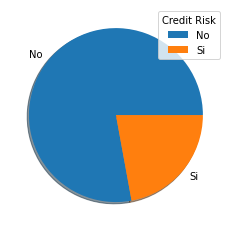

In [10]:
plt.pie(data["default.payment.next.month"].value_counts(normalize=True),labels = ["No","Si"],shadow = True)
plt.legend(title ="Credit Risk")
plt.show() 

El análisis define que estamos bajo una problema con clases desequilibradas.
- No: 75% aprox
- Si: 25% aprox

**c) Análisis de correlación.**

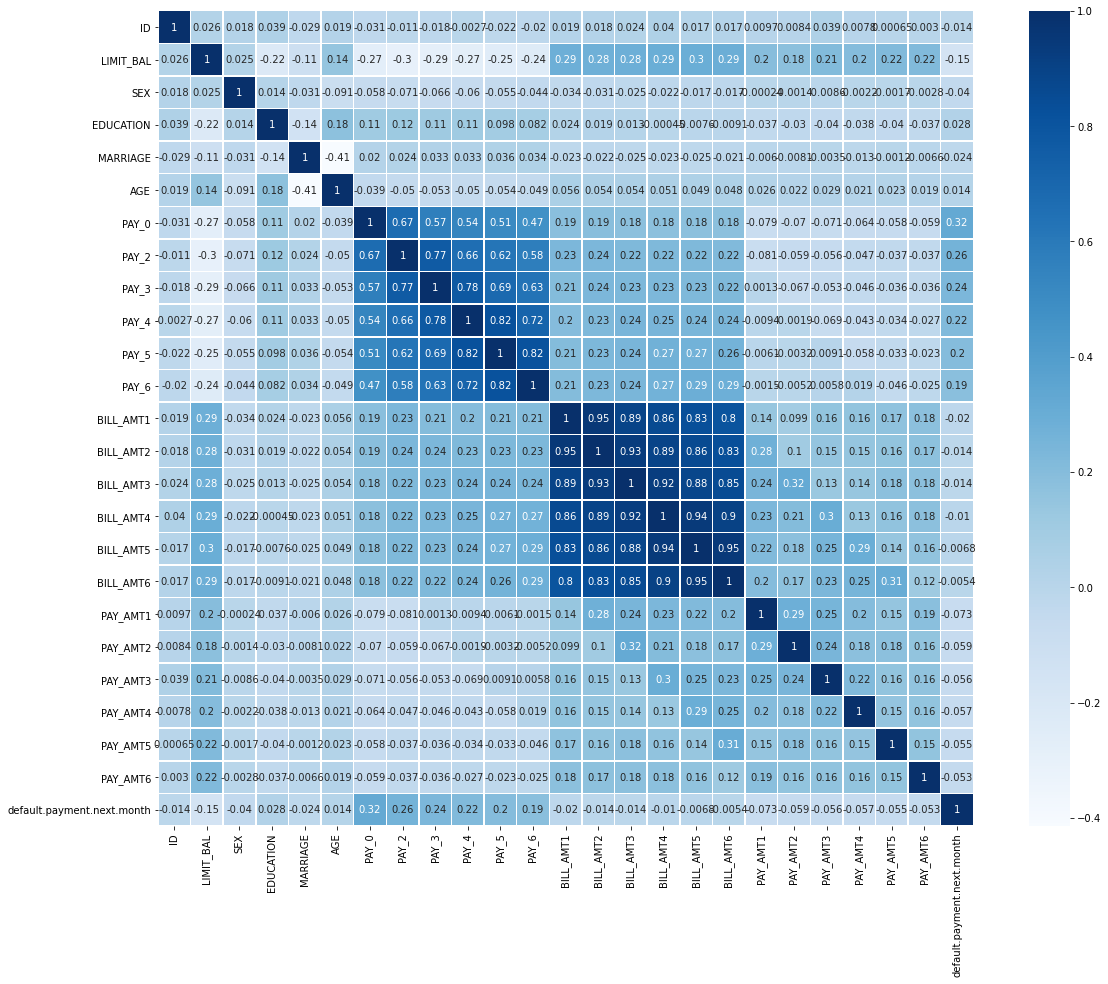

In [11]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=True,square=True, linewidths=.5,cmap=plt.cm.Blues)
plt.show()

Se detecta que las variables referidas a Estado de repago, Estado de cuenta y Pago previo en diferentes meses se correlacionan mucho entre sí. En los modelos que no incluyan regularización se utilizará solo una de ellas para la predicción (Septiembre 2005, más reciente).

**d) Análisis y transformación de variables predictivas.**

**Variable LIMIT_BAL:** Límite de crédito.

In [12]:
(data.LIMIT_BAL == 0).sum()

0

**Variable SEX:** Género (1=Hombre, 2=Mujer).

Lo transformamos en dummie (1 y 0):

In [13]:
data.SEX[data.SEX == 2]=0

In [14]:
data.SEX.value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

**Variable EDUCATION:** Nivel educativo alcanzado (1=Posgrado, 2=Universitario, 3=Secundario, 4=Otros, 5=unknown, 6=unknown).

In [15]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**Se detectan 14 observaciones con respuesta EDUCATION = 0, se asume son valores nulos no detectados previamente.**

**Variable MARRIAGE:**  Estado civil (1=Casado, 2=Soltero, 3=Otro).

Lo convertimos en variables dummies:

In [16]:
data.MARRIAGE[data.MARRIAGE == 1]="married"
data.MARRIAGE[data.MARRIAGE == 2]="single"
data.MARRIAGE[(data.MARRIAGE == 3) | (data.MARRIAGE == 0)]="others"

In [17]:
data.MARRIAGE.value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

In [18]:
dummies_marriage = pd.get_dummies(data.MARRIAGE, drop_first = True, prefix = 'MARR')
data = pd.concat([data, dummies_marriage], axis=1)
data=data.drop(["MARRIAGE"], axis=1)

**Variable 'PAY_0':** Estado de repago en Septiembre 2005 (-1=Sin deuda, 1=Atraso de pago por 1 mes, 2=Atraso de pago por 2 meses, … , 9=Atraso de pago por 9 meses o más).

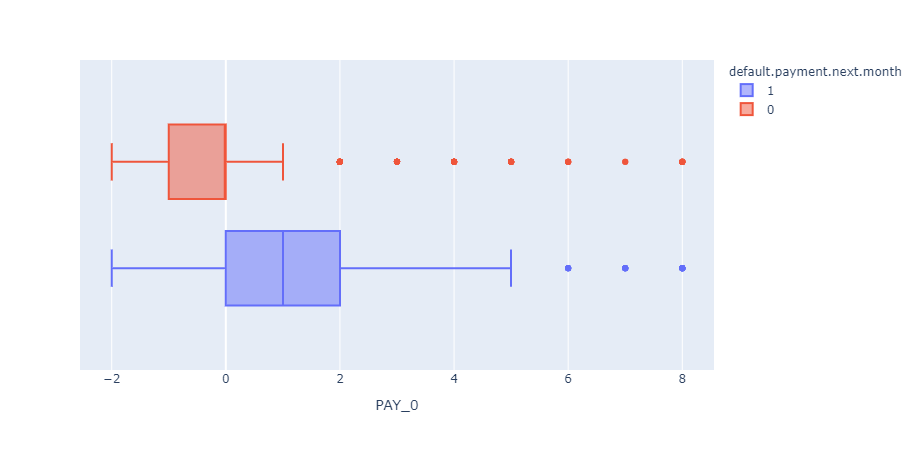

In [19]:
px.box(data_frame=data,x='PAY_0', color='default.payment.next.month')

In [20]:
data.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

**Se detectan 14737 observaciones con respuesta PAY_0 = 0, asi como también 2759 PAY_0 =-2. Se asume son valores nulos no detectados previamente. Se unifican los valores en un único dato PAY_0 = 0 para luego transformarlo en variable dummie "otros"**

In [21]:
data.PAY_0[(data.PAY_0 == -2)] = 0

**Variable 'PAY_2':** Estado de repago en Agosto 2005.

In [22]:
data.PAY_2.value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [23]:
data.PAY_2[(data.PAY_2 == -2)] = 0

**Variable 'PAY_3':** Estado de repago en Julio 2005.

In [24]:
data.PAY_3.value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [25]:
data.PAY_3[(data.PAY_3 == -2)] = 0

**Variable 'PAY_4':** Estado de repago en Junio 2005.

In [26]:
data.PAY_4.value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

In [27]:
data.PAY_4[(data.PAY_4 == -2)] = 0

**Variable 'PAY_5':** Estado de repago en Mayo 2005.

In [28]:
data.PAY_5.value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [29]:
data.PAY_5[(data.PAY_5 == -2)] = 0

**Variable 'PAY_6':** Estado de repago en Abril 2005.

In [30]:
data.PAY_6.value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [31]:
data.PAY_6[(data.PAY_6 == -2)] = 0

In [32]:
data=pd.get_dummies(data, columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], prefix =['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
data=data.drop(["PAY_0_0","PAY_2_0", "PAY_3_0", "PAY_4_0", "PAY_5_0", "PAY_6_0"], axis=1)

In [33]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
0   1    20000.0    0          2   24     3913.0     3102.0      689.0   
1   2   120000.0    0          2   26     2682.0     1725.0     2682.0   
2   3    90000.0    0          2   34    29239.0    14027.0    13559.0   
3   4    50000.0    0          2   37    46990.0    48233.0    49291.0   
4   5    50000.0    1          2   57     8617.0     5670.0    35835.0   

   BILL_AMT4  BILL_AMT5  ...  PAY_5_7  PAY_5_8  PAY_6_-1  PAY_6_2  PAY_6_3  \
0        0.0        0.0  ...        0        0         0        0        0   
1     3272.0     3455.0  ...        0        0         0        1        0   
2    14331.0    14948.0  ...        0        0         0        0        0   
3    28314.0    28959.0  ...        0        0         0        0        0   
4    20940.0    19146.0  ...        0        0         0        0        0   

   PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0        0        0        0        0        0  
1        0        0        0        0        0  
2        0        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        0        0  

[5 rows x 72 columns]

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   BILL_AMT1                   30000 non-null  float64
 6   BILL_AMT2                   30000 non-null  float64
 7   BILL_AMT3                   30000 non-null  float64
 8   BILL_AMT4                   30000 non-null  float64
 9   BILL_AMT5                   30000 non-null  float64
 10  BILL_AMT6                   30000 non-null  float64
 11  PAY_AMT1                    30000 non-null  float64
 12  PAY_AMT2                    30000 non-null  float64
 13  PAY_AMT3                    300

**Variable BILL_AMT1:** Estado de cuenta Septiembre 2005.

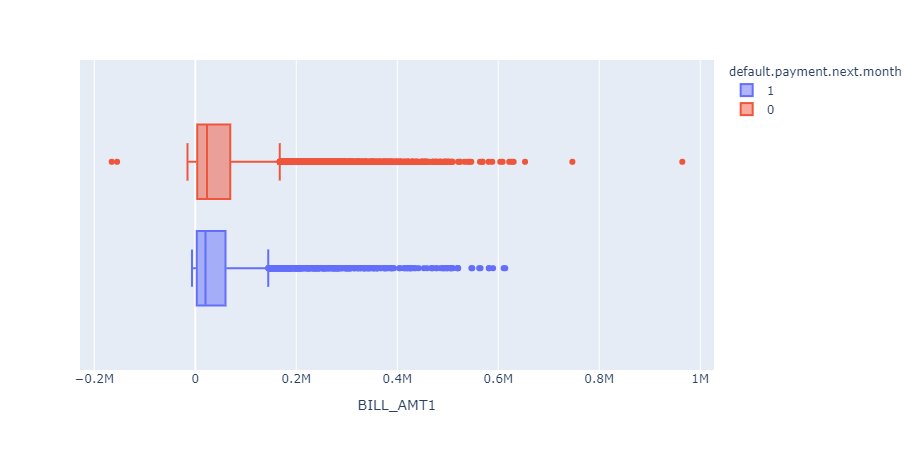

In [35]:
px.box(data_frame=data, x='BILL_AMT1', color='default.payment.next.month')

In [36]:
(data.BILL_AMT1 == 0).sum()

2008

**Variable BILL_AMT2:** Estado de cuenta Agosto 2005.

In [37]:
print((data.BILL_AMT2 == 0).sum())
((data.BILL_AMT2 == 0) & (data.PAY_AMT1 != 0)).sum()

2506


38

**Variable BILL_AMT3:** Estado de cuenta Julio 2005.

In [38]:
print(((data.BILL_AMT3 == 0) & (data.BILL_AMT2 == 0)).sum())
print((data.BILL_AMT3 == 0).sum())
((data.BILL_AMT3 == 0) & (data.PAY_AMT2 != 0)).sum()

1868
2870


56

**Variable BILL_AMT4:** Estado de cuenta Junio 2005.

In [39]:
print((data.BILL_AMT4 == 0).sum())
((data.BILL_AMT4 == 0) & (data.PAY_AMT3 != 0)).sum()

3195


45

**Variable BILL_AMT5:** Estado de cuenta Mayo 2005.

In [40]:
print((data.BILL_AMT5 == 0).sum())
((data.BILL_AMT5 == 0) & (data.PAY_AMT4 != 0)).sum()

3506


57

**Variable BILL_AMT6:** Estado de cuenta Abril 2005.

In [41]:
print((data.BILL_AMT6 == 0).sum())
((data.BILL_AMT6 == 0) & (data.PAY_AMT5 != 0)).sum()

4020


61

**Variable PAY_AMT1:** Pago previo Septiembre 2005.

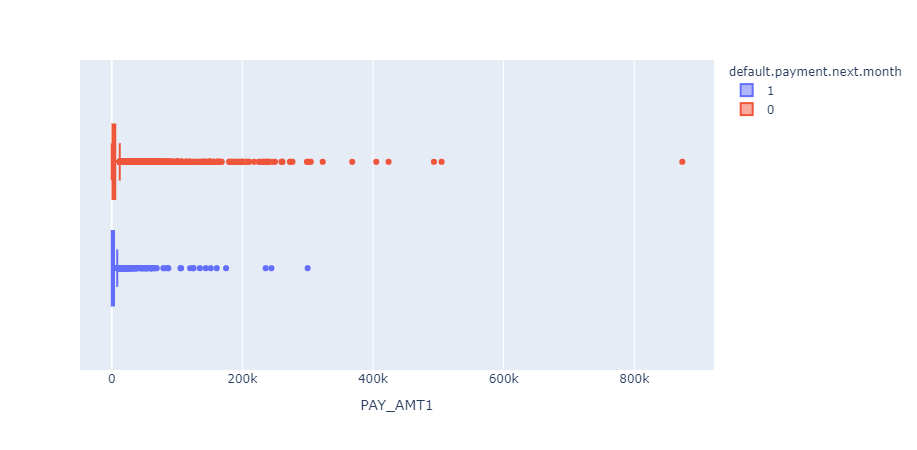

In [42]:
px.box(data_frame=data,x='PAY_AMT1', color='default.payment.next.month')

## 3. Interacción de variables predictivas.

Como complemento a los modelos a desarrollar se realizarán interacción de variables definidas por el equipo a los fines de verificar si éstas colaboran con la predicción.

Hemos pensado que las siguientes relaciones entre features pueden contribuir positivamente al resultado obtenido:

- data.LIMIT_BAL / data.BILL_AMT1
- data.PAY_AMT1 / data.BILL_AMT2
- data.PAY_AMT2 / data.BILL_AMT3
- data.PAY_AMT3 / data.BILL_AMT4
- data.PAY_AMT4 / data.BILL_AMT5
- data.PAY_AMT5 / data.BILL_AMT6

**a) data.LIMIT_BAL / data.BILL_AMT1**: límite / estado de cuenta.

In [43]:
data["limite_estado"]=data.LIMIT_BAL / data.BILL_AMT1

**b) data.PAY_AMT1 / data.BILL_AMT2**: pago realizado Septiembre 2005 / estado de cuenta Agosto 2005.

In [44]:
(data.PAY_AMT1 / data.BILL_AMT2).value_counts()

 1.000000    4066
 0.000000    2781
 inf           38
 2.000000      33
-1.000000      29
             ... 
 1.003157       1
 1.003273       1
 0.044605       1
 0.041825       1
 0.072077       1
Length: 20290, dtype: int64

In [45]:
data["estado_pago_1"]=(data.PAY_AMT1 / data.BILL_AMT2)

**c) data.PAY_AMT2 / data.BILL_AMT3**: pago realizado Agosto 2005 / estado de cuenta Julio 2005.

In [46]:
(data.PAY_AMT2 / data.BILL_AMT3).value_counts()

 1.000000    4087
 0.000000    2582
 inf           56
 2.000000      39
-1.000000      22
             ... 
 0.765492       1
 0.046745       1
 0.052214       1
 0.352113       1
 0.076453       1
Length: 20123, dtype: int64

In [47]:
data["estado_pago_2"]=(data.PAY_AMT2 / data.BILL_AMT3)

**d) data.PAY_AMT3 / data.BILL_AMT4**: pago realizado Julio 2005 / estado de cuenta Junio 2005.

In [48]:
(data.PAY_AMT3 / data.BILL_AMT4)

0             NaN
1        0.305623
2        0.069779
3        0.042382
4        0.477555
           ...   
29995    0.056850
29996    1.002116
29997    1.053741
29998    0.022322
29999    0.039141
Length: 30000, dtype: float64

In [49]:
data.PAY_AMT3[0]

0.0

In [50]:
data.BILL_AMT4[0]

0.0

In [51]:
data["estado_pago_3"]=(data.PAY_AMT3 / data.BILL_AMT4)

**e) data.PAY_AMT4 / data.BILL_AMT5**: pago realizado Junio 2005 / estado de cuenta Mayo 2005.

In [52]:
(data.PAY_AMT4 / data.BILL_AMT5).value_counts()

 1.000000    4361
 0.000000    2959
 inf           57
 0.020000      50
-1.000000      29
             ... 
 0.317894       1
 0.035888       1
 1.004730       1
 0.089556       1
 0.056306       1
Length: 18674, dtype: int64

In [53]:
data["estado_pago_4"]=(data.PAY_AMT4 / data.BILL_AMT5)

**f) data.PAY_AMT5 / data.BILL_AMT6**: pago realizado Mayo 2005 / estado de cuenta Abril 2005.

In [54]:
print((data.PAY_AMT5 / data.BILL_AMT6).value_counts())

 1.000000    4616
 0.000000    2744
 inf           61
 0.020000      52
-1.000000      30
             ... 
 0.030346       1
 0.037058       1
 0.039460       1
 0.013944       1
 1.004057       1
Length: 18113, dtype: int64


In [55]:
data["estado_pago_5"]=(data.PAY_AMT5 / data.BILL_AMT6)

In [56]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
0   1    20000.0    0          2   24     3913.0     3102.0      689.0   
1   2   120000.0    0          2   26     2682.0     1725.0     2682.0   
2   3    90000.0    0          2   34    29239.0    14027.0    13559.0   
3   4    50000.0    0          2   37    46990.0    48233.0    49291.0   
4   5    50000.0    1          2   57     8617.0     5670.0    35835.0   

   BILL_AMT4  BILL_AMT5  ...  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  \
0        0.0        0.0  ...        0        0        0        0   
1     3272.0     3455.0  ...        0        0        0        0   
2    14331.0    14948.0  ...        0        0        0        0   
3    28314.0    28959.0  ...        0        0        0        0   
4    20940.0    19146.0  ...        0        0        0        0   

   limite_estado  estado_pago_1  estado_pago_2  estado_pago_3  estado_pago_4  \
0       5.111168       0.000000       1.000000            NaN            NaN   
1      44.742729       0.000000       0.372856       0.305623       0.289436   
2       3.078081       0.108220       0.110628       0.069779       0.066899   
3       1.064056       0.041465       0.040961       0.042382       0.037985   
4       5.802483       0.352734       1.023608       0.477555       0.470072   

   estado_pago_5  
0            NaN  
1       0.000000  
2       0.064313  
3       0.036180  
4       0.036015  

[5 rows x 78 columns]

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   BILL_AMT1                   30000 non-null  float64
 6   BILL_AMT2                   30000 non-null  float64
 7   BILL_AMT3                   30000 non-null  float64
 8   BILL_AMT4                   30000 non-null  float64
 9   BILL_AMT5                   30000 non-null  float64
 10  BILL_AMT6                   30000 non-null  float64
 11  PAY_AMT1                    30000 non-null  float64
 12  PAY_AMT2                    30000 non-null  float64
 13  PAY_AMT3                    300

**Corrección de valores nulos**: Se detecta que se genera un valor nulo cuando la operación es = 0 / 0. Pasaran a ser reemplazados por el número 0.

In [58]:
data.estado_pago_1[data.estado_pago_1.isna()] = 0
data.estado_pago_2[data.estado_pago_2.isna()] = 0
data.estado_pago_3[data.estado_pago_3.isna()] = 0
data.estado_pago_4[data.estado_pago_4.isna()] = 0
data.estado_pago_5[data.estado_pago_5.isna()] = 0

**Corrección de valores inf**: Se detectan valores inf que serán eliminados del dataset para no generar problemas con los modelos a desarrollar.

In [59]:
data[data == float('inf')] = np.NaN

In [60]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
0   1    20000.0    0          2   24     3913.0     3102.0      689.0   
1   2   120000.0    0          2   26     2682.0     1725.0     2682.0   
2   3    90000.0    0          2   34    29239.0    14027.0    13559.0   
3   4    50000.0    0          2   37    46990.0    48233.0    49291.0   
4   5    50000.0    1          2   57     8617.0     5670.0    35835.0   

   BILL_AMT4  BILL_AMT5  ...  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  \
0        0.0        0.0  ...        0        0        0        0   
1     3272.0     3455.0  ...        0        0        0        0   
2    14331.0    14948.0  ...        0        0        0        0   
3    28314.0    28959.0  ...        0        0        0        0   
4    20940.0    19146.0  ...        0        0        0        0   

   limite_estado  estado_pago_1  estado_pago_2  estado_pago_3  estado_pago_4  \
0       5.111168       0.000000       1.000000       0.000000       0.000000   
1      44.742729       0.000000       0.372856       0.305623       0.289436   
2       3.078081       0.108220       0.110628       0.069779       0.066899   
3       1.064056       0.041465       0.040961       0.042382       0.037985   
4       5.802483       0.352734       1.023608       0.477555       0.470072   

   estado_pago_5  
0       0.000000  
1       0.000000  
2       0.064313  
3       0.036180  
4       0.036015  

[5 rows x 78 columns]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   BILL_AMT1                   30000 non-null  float64
 6   BILL_AMT2                   30000 non-null  float64
 7   BILL_AMT3                   30000 non-null  float64
 8   BILL_AMT4                   30000 non-null  float64
 9   BILL_AMT5                   30000 non-null  float64
 10  BILL_AMT6                   30000 non-null  float64
 11  PAY_AMT1                    30000 non-null  float64
 12  PAY_AMT2                    30000 non-null  float64
 13  PAY_AMT3                    300

In [62]:
data=data.dropna()

In [63]:
data.shape

(27777, 78)

## 3. Modelo de regresión logística.

**Definición de features y target.**

In [64]:
X = data.drop(['ID', 'default.payment.next.month'], axis=1)
y = data['default.payment.next.month']

**Definición de train y test.**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify= y, random_state = 0)

print("Train:", X_train.shape, y_train.shape)
print("Test:",  X_test.shape, y_test.shape)

Train: (19443, 76) (19443,)
Test: (8334, 76) (8334,)


**Escalado de datos.**

In [66]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
def mostrar_resultados(y_test, pred_y):
    conf_mat = confusion_matrix(y_test, pred_y)
    conf_mat_df = pd.DataFrame(data=conf_mat,index=['Actual Negative: 0', 'Actual Positive: 1'], columns=['Predict Negative: 0', 'Predict Positive: 1'])
    sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
    print (classification_report(y_test, pred_y))
    
def run_model_f(X_train, y_train, p_C, p_penalty, p_solver):
    clf_base = LogisticRegression(C=p_C, penalty=p_penalty, solver=p_solver,random_state=1)
    clf_base.fit(X_train, y_train)
    return clf_base
    

---
**Exploración de técnicas para clases desbalanceadas.**

**a) Undersampling**

In [68]:
undersampler=RandomUnderSampler(sampling_strategy='majority',random_state=0); # iguala las clases

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

scaler=StandardScaler()  
X_train_us_sc=scaler.fit_transform(X_train_us)     
X_test_us_sc=scaler.transform(X_test)

print('ANTERIOR Composición del training set:\n', y_train.value_counts())
print('NUEVA Composición del training set:\n', y_train_us.value_counts())

ANTERIOR Composición del training set:
 0    15202
1     4241
Name: default.payment.next.month, dtype: int64
NUEVA Composición del training set:
 1    4241
0    4241
Name: default.payment.next.month, dtype: int64


In [69]:
model = LogisticRegression()

params = [
    {'C': [1, 10, 50, 100, 250, 500, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga', "newton-cg"]},
]

folds = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=params, scoring='recall', cv=folds, n_jobs=4)

grid.fit(X_train_us_sc, y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [1, 10, 50, 100, 250, 500, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['saga', 'newton-cg']}],
             scoring='recall')

In [70]:
print (grid.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6516
           1       0.54      0.58      0.56      1818

    accuracy                           0.80      8334
   macro avg       0.71      0.72      0.71      8334
weighted avg       0.81      0.80      0.80      8334



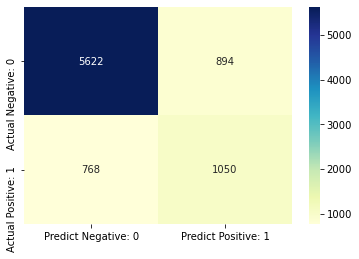

In [71]:
model_under = run_model_f(X_train_us_sc, y_train_us,10,'l2','newton-cg')
y_pred_us_sc = model_under.predict(X_test_us_sc)
mostrar_resultados(y_test, y_pred_us_sc)

In [72]:
print(accuracy_score(y_test, y_pred_us_sc))
print(recall_score(y_test, y_pred_us_sc))
print(f1_score(y_test, y_pred_us_sc))

0.8005759539236861
0.5775577557755776
0.5582137161084529


---
El modelo tiene resultados peores a los obtenidos: presenta mejoras en la métrica de Accuracy y empeora en las métricas de Recall y F1. 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

**b) Oversampling**       


In [73]:
oversampler=RandomOverSampler(sampling_strategy='minority',random_state=0)

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train)

scaler=StandardScaler()  
X_train_os_sc=scaler.fit_transform(X_train_os) 
X_test_os_sc=scaler.transform(X_test)

print('ANTERIOR Composición del training set:\n', y_train.value_counts())
print('NUEVA Composición del training set:\n', y_train_os.value_counts())

ANTERIOR Composición del training set:
 0    15202
1     4241
Name: default.payment.next.month, dtype: int64
NUEVA Composición del training set:
 1    15202
0    15202
Name: default.payment.next.month, dtype: int64


In [74]:
grid.fit(X_train_os_sc, y_train_os)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [1, 10, 50, 100, 250, 500, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['saga', 'newton-cg']}],
             scoring='recall')

In [75]:
print (grid.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6516
           1       0.55      0.58      0.56      1818

    accuracy                           0.80      8334
   macro avg       0.71      0.72      0.72      8334
weighted avg       0.81      0.80      0.80      8334



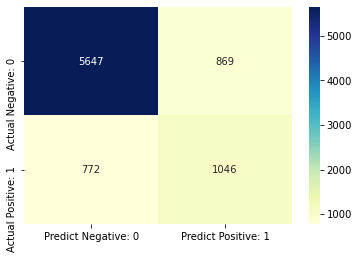

In [76]:
model_over = run_model_f(X_train_os_sc, y_train_os,10,'l2','newton-cg')
y_pred_os_sc = model_over.predict(X_test_os_sc)
mostrar_resultados(y_test, y_pred_os_sc)

In [77]:
print(accuracy_score(y_test, y_pred_os_sc))
print(recall_score(y_test, y_pred_os_sc))
print(f1_score(y_test, y_pred_os_sc))

0.8030957523398128
0.5753575357535754
0.5604071792124297


---
El modelo tiene resultados peores a los obtenidos: presenta mejoras en la métrica de Accuracy y empeora en las métricas de Recall y F1, si bien a nivel general se comporta mejor que el modelo de Undersampling.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

**c) Smote**      

In [78]:
smote=SMOTENC(categorical_features=[1, 2],sampling_strategy='minority',random_state=123);

X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train);

scaler=StandardScaler()  
X_train_sm_sc=scaler.fit_transform(X_train_sm) 
X_test_sm_sc=scaler.transform(X_test)

In [79]:
print('NUEVA Composición del training set:\n', y_train_sm.value_counts())

NUEVA Composición del training set:
 1    15202
0    15202
Name: default.payment.next.month, dtype: int64


In [80]:
grid.fit(X_train_sm_sc, y_train_sm)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [1, 10, 50, 100, 250, 500, 1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['saga', 'newton-cg']}],
             scoring='recall')

In [81]:
print (grid.best_params_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


              precision    recall  f1-score   support

           0       0.86      0.70      0.77      6516
           1       0.36      0.60      0.45      1818

    accuracy                           0.68      8334
   macro avg       0.61      0.65      0.61      8334
weighted avg       0.75      0.68      0.70      8334



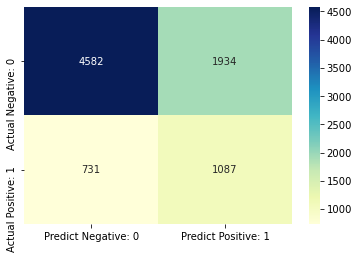

In [82]:
model_sm = run_model_f(X_train_sm_sc, y_train_sm,100,'l2','newton-cg')
y_pred_sm = model_sm.predict(X_test_sm_sc)
mostrar_resultados(y_test, y_pred_sm)

In [83]:
print(accuracy_score(y_test, y_pred_sm))
print(recall_score(y_test, y_pred_sm))
print(f1_score(y_test, y_pred_sm))

0.6802255819534437
0.5979097909790979
0.44926637735069225


---
El modelo tiene resultados peores a los obtenidos: ante una métrica similar en Recall empeora las métricas de Accuracy y F1.

**d) Modelo de regresión logística para clases desbalanceadas.**

1. Random y Grid Search de hiperparámetros.

In [84]:
logistic = LogisticRegression(class_weight='balanced')

params = [
    {'C': [1, 10, 50, 100, 250, 500, 1000],
     'penalty': ['l1', 'l2'],
     'solver': ['saga', "newton-cg"]},
]

folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

rand_search = RandomizedSearchCV(logistic, params, scoring=["recall","neg_log_loss","f1","accuracy"], refit="neg_log_loss", 
                                 cv=folds, n_jobs=4, random_state=0)

rand_search.fit(X_train_scaled, y_train)

print(rand_search.best_params_)

{'solver': 'saga', 'penalty': 'l2', 'C': 1}


In [85]:
logistic = LogisticRegression(class_weight="balanced", penalty= 'l2', solver= 'saga')

param_grid = [
    {'C': [300,400,500,600,700,800,900,950]}
]

grid = GridSearchCV(logistic, param_grid, scoring=["recall","neg_log_loss","f1","accuracy"], refit="neg_log_loss", cv=folds, n_jobs=4)

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='saga'),
             n_jobs=4,
             param_grid=[{'C': [300, 400, 500, 600, 700, 800, 900, 950]}],
             refit='neg_log_loss',
             scoring=['recall', 'neg_log_loss', 'f1', 'accuracy'])

In [86]:
print (grid.best_params_)

{'C': 500}


2.  Modelo Final

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6516
           1       0.55      0.58      0.56      1818

    accuracy                           0.80      8334
   macro avg       0.71      0.72      0.72      8334
weighted avg       0.81      0.80      0.81      8334



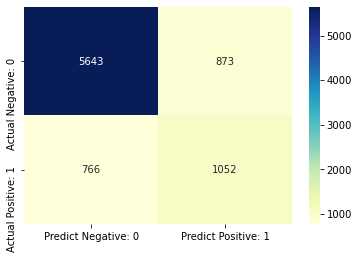

In [87]:
def run_model_balanced(X_train, X_test, y_train, y_test, p_C, p_penalty, p_solver):
    clf = LogisticRegression(C=p_C, penalty=p_penalty, random_state=1, solver=p_solver, class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model_balanced = run_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test, 600,'l2','saga')

y_pred_balanced = model_balanced.predict(X_test_scaled)

mostrar_resultados(y_test, y_pred_balanced)

In [88]:
print(accuracy_score(y_test, y_pred_balanced))
print(recall_score(y_test, y_pred_balanced))
print(f1_score(y_test, y_pred_balanced))

0.8033357331413487
0.5786578657865786
0.5621159497729094


**Interpretabilidad**

In [89]:
logistic_l1 = LogisticRegression(class_weight='balanced', penalty= 'l1')

params = [
    {'C': [1, 10, 50, 100, 250, 500, 1000],
     'solver': ['saga', "newton-cg"]},
]

folds = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

rand_search = RandomizedSearchCV(logistic_l1, params, scoring=["recall","neg_log_loss","f1","accuracy"], refit="neg_log_loss", 
                                 cv=folds, n_jobs=4, random_state=0)

rand_search.fit(X_train_scaled, y_train)

print(rand_search.best_params_)


{'solver': 'saga', 'C': 10}


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6516
           1       0.55      0.58      0.56      1818

    accuracy                           0.80      8334
   macro avg       0.71      0.72      0.72      8334
weighted avg       0.81      0.80      0.81      8334



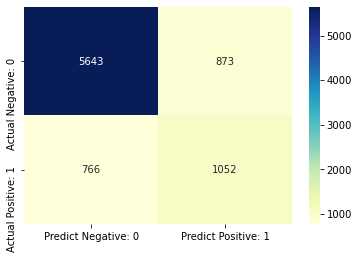

In [90]:
model_balanced_in = run_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test, 250, 'l1', 'saga')

y_pred_balanced_in = model_balanced_in.predict(X_test_scaled)

mostrar_resultados(y_test, y_pred_balanced_in)

---
**Primeras conclusiones respecto a resultados TP3-Mejor modelo:**
- Accuracy: 0.803335
- Recall: 0.578657
- F1: 0.562115

En líneas generales si bien el recall es menor y detectamos menos Positivos me parece que el modelo predice mejor. Los que desarrollamos el TP pasado tenían un costo muy grande de Negativos que tomamos como Positivos.
La matriz era así:

    4889 - 2120 
    719 - 1272

---

**e) Modelo con PCA**   


In [91]:
std = StandardScaler()
X_train_std = pd.DataFrame(std.fit_transform(X_train))
X_test_std = pd.DataFrame(std.transform(X_test))

pca_df = PCA() 
pca_df.fit(X_train_std)

PCA()

In [92]:
np.set_printoptions(precision=6, suppress=True)
pca_df.explained_variance_

array([6.71531 , 4.611025, 4.084885, 3.455838, 3.039637, 2.70827 ,
       2.688343, 2.409551, 2.069982, 1.966035, 1.945445, 1.681824,
       1.62263 , 1.562627, 1.497573, 1.452348, 1.374877, 1.260852,
       1.165646, 1.135782, 1.092548, 1.06771 , 1.024461, 1.010585,
       0.991408, 0.979254, 0.946291, 0.928944, 0.913033, 0.878577,
       0.862373, 0.836002, 0.82199 , 0.794971, 0.782418, 0.775188,
       0.752546, 0.72452 , 0.703504, 0.688437, 0.64059 , 0.611536,
       0.578027, 0.554111, 0.5424  , 0.514193, 0.498859, 0.484634,
       0.43106 , 0.395333, 0.379357, 0.365774, 0.341945, 0.335439,
       0.321788, 0.306781, 0.282906, 0.275909, 0.271253, 0.247568,
       0.238739, 0.206517, 0.204309, 0.183682, 0.167164, 0.13871 ,
       0.104955, 0.070008, 0.066398, 0.062655, 0.037982, 0.032899,
       0.027467, 0.024468, 0.023027, 0.01223 ])

In [93]:
pca_df.explained_variance_ratio_

array([0.088355, 0.060668, 0.053746, 0.045469, 0.039993, 0.035633,
       0.035371, 0.031703, 0.027235, 0.025868, 0.025597, 0.022128,
       0.021349, 0.02056 , 0.019704, 0.019109, 0.01809 , 0.016589,
       0.015337, 0.014944, 0.014375, 0.014048, 0.013479, 0.013296,
       0.013044, 0.012884, 0.012451, 0.012222, 0.012013, 0.01156 ,
       0.011346, 0.010999, 0.010815, 0.01046 , 0.010294, 0.010199,
       0.009901, 0.009533, 0.009256, 0.009058, 0.008428, 0.008046,
       0.007605, 0.007291, 0.007136, 0.006765, 0.006564, 0.006376,
       0.005672, 0.005201, 0.004991, 0.004813, 0.004499, 0.004413,
       0.004234, 0.004036, 0.003722, 0.00363 , 0.003569, 0.003257,
       0.003141, 0.002717, 0.002688, 0.002417, 0.002199, 0.001825,
       0.001381, 0.000921, 0.000874, 0.000824, 0.0005  , 0.000433,
       0.000361, 0.000322, 0.000303, 0.000161])

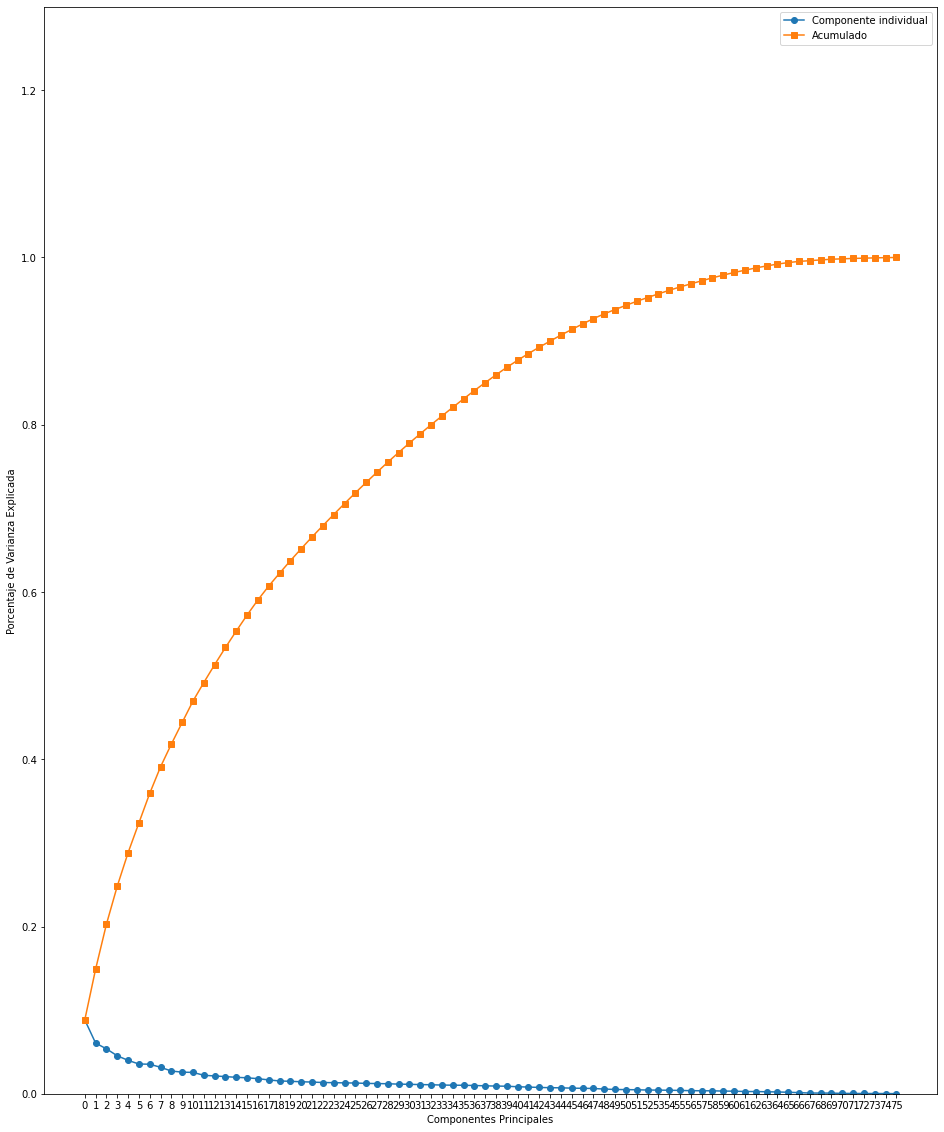

In [94]:
plt.figure(figsize=(16,20))

plt.plot(range(76), pca_df.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(range(76), np.cumsum(pca_df.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(0,1.30); plt.xticks(range(76))
plt.legend(loc=0);

In [95]:
pcs_df = pd.DataFrame(pca_df.components_)
pcs_df.corr()

0         1         2         3         4         5         6   \
0   1.000000  0.000556 -0.004344 -0.000851 -0.001864  0.006204 -0.001743   
1   0.000556  1.000000  0.001904  0.000373  0.000817 -0.002719  0.000764   
2  -0.004344  0.001904  1.000000 -0.002912 -0.006378  0.021234 -0.005967   
3  -0.000851  0.000373 -0.002912  1.000000 -0.001249  0.004159 -0.001169   
4  -0.001864  0.000817 -0.006378 -0.001249  1.000000  0.009109 -0.002560   
..       ...       ...       ...       ...       ...       ...       ...   
71  0.001354 -0.000593  0.004634  0.000908  0.001988 -0.006618  0.001860   
72  0.006472 -0.002836  0.022151  0.004338  0.009502 -0.031634  0.008890   
73 -0.011164  0.004893 -0.038212 -0.007484 -0.016392  0.054571 -0.015335   
74 -0.004789  0.002099 -0.016391 -0.003210 -0.007032  0.023408 -0.006578   
75 -0.008954  0.003924 -0.030647 -0.006002 -0.013147  0.043767 -0.012299   

          7         8         9   ...        66        67        68        69  \
0  -0.002556  0.003621  0.005366  ...  0.005023  0.002823 -0.003195  0.001777   
1   0.001120 -0.001587 -0.002352  ... -0.002201 -0.001237  0.001400 -0.000779   
2  -0.008748  0.012393  0.018367  ...  0.017193  0.009662 -0.010937  0.006081   
3  -0.001713  0.002427  0.003597  ...  0.003367  0.001892 -0.002142  0.001191   
4  -0.003753  0.005317  0.007879  ...  0.007375  0.004145 -0.004692  0.002609   
..       ...       ...       ...  ...       ...       ...       ...       ...   
71  0.002727 -0.003863 -0.005725  ... -0.005359 -0.003012  0.003409 -0.001895   
72  0.013033 -0.018463 -0.027363  ... -0.025613 -0.014394  0.016293 -0.009059   
73 -0.022482  0.031851  0.047204  ...  0.044185  0.024831 -0.028107  0.015628   
74 -0.009644  0.013663  0.020248  ...  0.018953  0.010652 -0.012057  0.006704   
75 -0.018032  0.025545  0.037859  ...  0.035437  0.019916 -0.022543  0.012534   

          70        71        72        73        74        75  
0   0.000645  0.001354  0.006472 -0.011164 -0.004789 -0.008954  
1  -0.000283 -0.000593 -0.002836  0.004893  0.002099  0.003924  
2   0.002208  0.004634  0.022151 -0.038212 -0.016391 -0.030647  
3   0.000432  0.000908  0.004338 -0.007484 -0.003210 -0.006002  
4   0.000947  0.001988  0.009502 -0.016392 -0.007032 -0.013147  
..       ...       ...       ...       ...       ...       ...  
71 -0.000688  1.000000 -0.006904  0.011910  0.005109  0.009552  
72 -0.003289 -0.006904  1.000000  0.056927  0.024419  0.045657  
73  0.005674  0.011910  0.056927  1.000000 -0.042125 -0.078762  
74  0.002434  0.005109  0.024419 -0.042125  1.000000 -0.033785  
75  0.004550  0.009552  0.045657 -0.078762 -0.033785  1.000000  

[76 rows x 76 columns]

---
**Pipeline con modelo PCA y Random Search**

In [96]:
std = StandardScaler()
X_train_std = pd.DataFrame(std.fit_transform(X_train))
X_test_std = pd.DataFrame(std.transform(X_test))

pca = PCA()

logistic =LogisticRegression()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

param_grid = {
    'pca__n_components': [2, 5, 15, 30, 45, 64, 76],
    'logistic__C': [1,5, 10, 50, 100, 250, 500, 1000,2500,5000,10000],
    'logistic__penalty': ['l1', 'l2',],
    'logistic__solver':['saga', "newton-cg"], 
    'logistic__class_weight' :["balanced", None]
}

folds = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

search = RandomizedSearchCV(pipe, param_grid, scoring='recall', cv=folds, n_jobs=-1, random_state=0)
search.fit(X_train_std, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.567):
{'pca__n_components': 64, 'logistic__solver': 'newton-cg', 'logistic__penalty': 'l2', 'logistic__class_weight': 'balanced', 'logistic__C': 2500}


              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6516
           1       0.55      0.59      0.57      1818

    accuracy                           0.81      8334
   macro avg       0.72      0.73      0.72      8334
weighted avg       0.81      0.81      0.81      8334



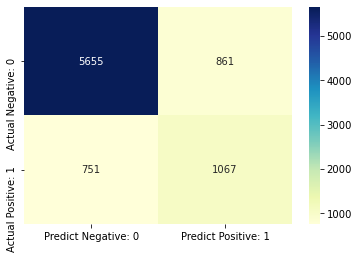

In [97]:
m_pca = PCA(45).fit(X_train_std)
X_train_PCA = m_pca.transform(X_train_std)
X_test_PCA = m_pca.transform(X_test_std)
model_pca = run_model_balanced(X_train_PCA, X_test_PCA, y_train, y_test,100,'l2', 'newton-cg')

y_pred_pca = model_pca.predict(X_test_PCA)

mostrar_resultados(y_test, y_pred_pca)

In [98]:
print(accuracy_score(y_test, y_pred_pca))
print(recall_score(y_test, y_pred_pca))
print(f1_score(y_test, y_pred_pca))

0.8065754739620831
0.5869086908690869
0.5696743192738922


---
Este modelo con PCA tiene resultados similares a los obtenidos en el primer modelo pero decidimos quedarnos con el original ya que es mas explicativo

---

**Análisis de Thresholds**

In [99]:
predicciones = model_balanced.predict_proba(X = X_test_scaled)
predicciones_df = pd.DataFrame(predicciones, columns = model_balanced.classes_)
predicciones_df.head(2)

0         1
0  0.054420  0.945580
1  0.859076  0.140924

(0.0, 1.0)

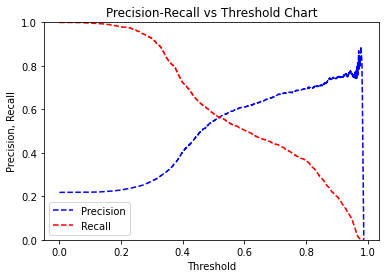

In [100]:
precision, recall, thresholds = precision_recall_curve(y_test, predicciones[:,1]) 
  
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [101]:
pred_proba_df = pd.DataFrame(model_balanced.predict_proba(X_test_scaled))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred_log = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    y_pred_th_log=Y_test_pred_log[1]
    print (classification_report(y_test, y_pred_th_log))



******** For i = 0.05 ******
              precision    recall  f1-score   support

           0       0.88      0.00      0.00      6516
           1       0.22      1.00      0.36      1818

    accuracy                           0.22      8334
   macro avg       0.55      0.50      0.18      8334
weighted avg       0.74      0.22      0.08      8334


******** For i = 0.1 ******
              precision    recall  f1-score   support

           0       0.89      0.01      0.02      6516
           1       0.22      1.00      0.36      1818

    accuracy                           0.22      8334
   macro avg       0.56      0.50      0.19      8334
weighted avg       0.75      0.22      0.09      8334


******** For i = 0.15 ******
              precision    recall  f1-score   support

           0       0.92      0.03      0.06      6516
           1       0.22      0.99      0.36      1818

    accuracy                           0.24      8334
   macro avg       0.57      0.51      

**Mejor Umbral 0.45**


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      6516
           1       0.48      0.64      0.55      1818

    accuracy                           0.77      8334
   macro avg       0.69      0.72      0.70      8334
weighted avg       0.80      0.77      0.78      8334



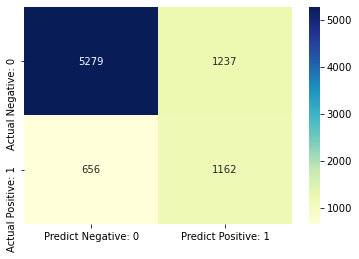

In [102]:
Y_test_pred_log_2 = pred_proba_df.applymap(lambda x: 1 if x>0.45 else 0)
y_pred_th_log_2=Y_test_pred_log_2[1]
mostrar_resultados(y_test, y_pred_th_log_2)

**CONCLUSIONES**

## Pipeline + Gridsearch
Ahora vamos a armar un pipeline y gridsearch para encontrar el mejor modelo posible utilizando varias técnicas.

In [103]:
X=data.drop(columns=["default.payment.next.month"])
cat_cols=["EDUCATION","AGE"]
num_cols=X.drop(columns=cat_cols).columns
y=data["default.payment.next.month"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify= y, random_state = 0)

In [104]:
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import recall_score, confusion_matrix, f1_score, make_scorer, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [105]:
nnc = MLPClassifier()

def projector(columns):
    return FunctionTransformer(lambda X: X[columns])

one_hot_encoder = FunctionTransformer(lambda X: pd.get_dummies(X, drop_first=True))

num_pipe = Pipeline([
    ("project", projector(num_cols)),
    ("scale", None),
])

cat_pipe = Pipeline([
    ("project", projector(cat_cols)),
    ("encode", None),
])

union = FeatureUnion([
    ("num", num_pipe),
    ("cat", cat_pipe),
])

pipe = Pipeline([
    ("union", union),
    ("estimate", GaussianNB()),
])

In [106]:

grid =[
       dict(
    union__num__scale=[ None],
    union__cat__encode=[None, one_hot_encoder],
    estimate = [DecisionTreeClassifier()],
    estimate__max_leaf_nodes = [25,50,75,100],
    estimate__splitter = ["best", "random"],  
    estimate__max_depth = [5,7,9,11],
    estimate__random_state = [123],
    estimate__class_weight = [None, "balanced"]
),
       dict(
    union__num__scale=[ None],
    union__cat__encode=[None, one_hot_encoder],
    estimate = [RandomForestClassifier()],
    estimate__max_leaf_nodes = [10,20,30,40],
    estimate__n_estimators = [100,500,1000],  
    estimate__max_depth = [4,5,6],
    estimate__random_state = [123],
    estimate__class_weight = [None, "balanced"]
),
      dict(
    union__num__scale=[ None],
    union__cat__encode=[None, one_hot_encoder],
    estimate = [ExtraTreesClassifier()],
    estimate__max_leaf_nodes = [10,20,30,40],
    estimate__n_estimators = [100,500,1000],  
    estimate__max_depth = [4,5,6],
    estimate__random_state = [123],
    estimate__class_weight = [None, "balanced"]
),
       dict(
    union__num__scale=[ None],
    union__cat__encode=[None, one_hot_encoder],
    estimate = [lgb.LGBMClassifier()],
    estimate__num_leaves = [10,20,30,40],
    estimate__n_estimators = [100,500,1000],  
    estimate__max_depth = [4,5,6],
    estimate__learning_rate = [0.1, 0.3, 0.5],
    estimate__random_state = [123],
    estimate__colsample_bytree = [.3,.5,.8],
    estimate__class_weight = [None, "balanced"]
)]


In [107]:
estim = DecisionTreeClassifier()
estim.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [108]:
gscv = GridSearchCV(pipe, grid, cv=4, verbose=1, n_jobs=-1,scoring=["recall","neg_log_loss","f1","accuracy"], refit="neg_log_loss")
gscv.fit(X_train, y_train)

Fitting 4 folds for each of 1712 candidates, totalling 6848 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 519.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 525.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 531.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 538.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 547.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 557.8min
[Parallel(n_jobs=-1)]: Done 6848 out of 6848 | elapsed: 565.9min finished


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('union',
                                        FeatureUnion(transformer_list=[('num',
                                                                        Pipeline(steps=[('project',
                                                                                         FunctionTransformer(func=<function projector.<locals>.<lambda> at 0x00000113D14E30D0>)),
                                                                                        ('scale',
                                                                                         None)])),
                                                                       ('cat',
                                                                        Pipeline(steps=[('project',
                                                                                         FunctionTransformer(func=<function projector.<locals>.<lambda> at 0x00000113D14E3160>)),
                     

In [109]:
gscv.best_params_

{'estimate': LGBMClassifier(colsample_bytree=0.3, max_depth=5, num_leaves=10,
                random_state=123),
 'estimate__class_weight': None,
 'estimate__colsample_bytree': 0.3,
 'estimate__learning_rate': 0.1,
 'estimate__max_depth': 5,
 'estimate__n_estimators': 100,
 'estimate__num_leaves': 10,
 'estimate__random_state': 123,
 'union__cat__encode': None,
 'union__num__scale': None}

In [110]:
results = pd.DataFrame(gscv.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.272287      0.013837         0.030918        0.004347   
1          0.287248      0.009222         0.039895        0.002116   
2          0.113446      0.008561         0.029921        0.002339   
3          0.123172      0.004375         0.042136        0.003335   
4          0.284984      0.008081         0.024684        0.001087   
...             ...           ...              ...             ...   
1707       6.741831      0.514642         2.149232        0.092642   
1708       7.921433      0.181739         3.062938        0.672671   
1709       8.048977      0.121936         3.976229        0.394848   
1710       9.459574      0.363106         3.474946        0.341402   
1711       9.149810      0.350788         4.247183        0.143724   

                                         param_estimate  \
0                              DecisionTreeClassifier()   
1                              DecisionTreeClassifier()   
2                              DecisionTreeClassifier()   
3                              DecisionTreeClassifier()   
4                              DecisionTreeClassifier()   
...                                                 ...   
1707  LGBMClassifier(colsample_bytree=0.3, max_depth...   
1708  LGBMClassifier(colsample_bytree=0.3, max_depth...   
1709  LGBMClassifier(colsample_bytree=0.3, max_depth...   
1710  LGBMClassifier(colsample_bytree=0.3, max_depth...   
1711  LGBMClassifier(colsample_bytree=0.3, max_depth...   

     param_estimate__class_weight param_estimate__max_depth  \
0                            None                         5   
1                            None                         5   
2                            None                         5   
3                            None                         5   
4                            None                         5   
...                           ...                       ...   
1707                     balanced                         6   
1708                     balanced                         6   
1709                     balanced                         6   
1710                     balanced                         6   
1711                     balanced                         6   

     param_estimate__max_leaf_nodes param_estimate__random_state  \
0                                25                          123   
1                                25                          123   
2                                25                          123   
3                                25                          123   
4                                50                          123   
...                             ...                          ...   
1707                            NaN                          123   
1708                            NaN                          123   
1709                            NaN                          123   
1710                            NaN                          123   
1711                            NaN                          123   

     param_estimate__splitter  ... mean_test_f1 std_test_f1 rank_test_f1  \
0                        best  ...     0.476283    0.010342          851   
1                        best  ...     0.476283    0.010342          851   
2                      random  ...     0.485212    0.005235          631   
3                      random  ...     0.485212    0.005235          631   
4                        best  ...     0.474622    0.008782          891   
...                       ...  ...          ...         ...          ...   
1707                      NaN  ...     0.463002    0.006576         1163   
1708                      NaN  ...     0.463540    0.008699         1149   
1709                      NaN  ...     0.463540    0.008699         1149   
1710                      NaN  ...     0.453619    0.002993         1331   
1711                      NaN  ...     0.45361

In [118]:
train_pred = gscv.predict_proba(X_train)[:,1]>.25
test_pred = gscv.predict_proba(X_test)[:,1]>.25

In [119]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.8036311268837114
0.8080153587712983


In [120]:
print(f1_score(y_train, train_pred))
print(f1_score(y_test, test_pred))

0.5734078212290503
0.5760466348701643


In [121]:
print(recall_score(y_train, train_pred))
print(recall_score(y_test, test_pred))

0.6050459797217638
0.5979097909790979


In [122]:
print(confusion_matrix(y_train, train_pred))
print(confusion_matrix(y_test, test_pred))

[[13059  2143]
 [ 1675  2566]]
[[5647  869]
 [ 731 1087]]


              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6516
           1       0.56      0.60      0.58      1818

    accuracy                           0.81      8334
   macro avg       0.72      0.73      0.73      8334
weighted avg       0.81      0.81      0.81      8334



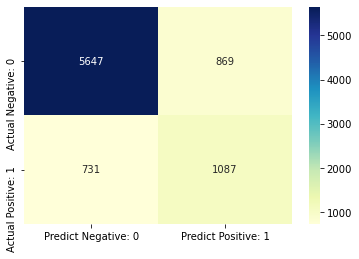

In [123]:
mostrar_resultados(y_test, test_pred)

**MATRIZ DE MODELOS**

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5935
           1       0.95      0.78      0.86      2399

    accuracy                           0.92      8334
   macro avg       0.93      0.88      0.90      8334
weighted avg       0.93      0.92      0.92      8334



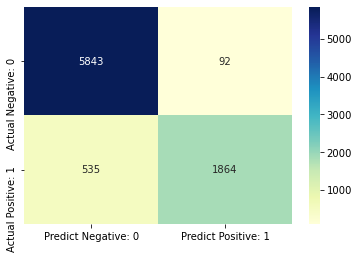

In [124]:
mostrar_resultados(y_pred_th_log_2, test_pred)